# Exploratory Data Analysis: Properties in the Province of Buenos Aires

### Dataset description 

In this project we work with a dataset of properties for sale published in the Properati portal. The dataset contains a series of variables with characteristics of properties published for different commercial operations in the city of Buenos Aires. data link: https://www.properati.com.ar/data/.

***

### 1. Basic evaluation of the dataset

Importing programs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

%matplotlib inline

###### 1.1 Loading dataset

In [2]:
df = pd.read_csv("Datos_Properati.csv")

In [3]:
import sys
print("size of the df: ", sys.getsizeof(df))
print(df.memory_usage())

size of the df:  283704142
Index                  128
start_date         1173280
end_date           1173280
created_on         1173280
lat                1173280
lon                1173280
l1                 1173280
l2                 1173280
l3                 1173280
rooms              1173280
bedrooms           1173280
bathrooms          1173280
surface_total      1173280
surface_covered    1173280
price              1173280
currency           1173280
title              1173280
description        1173280
property_type      1173280
operation_type     1173280
dtype: int64


###### 1.2 Number of rows and columns in the dataframe (df)

In [4]:
df.shape

(146660, 19)

###### 1.3 Dataframe variable names

In [5]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

###### 1.4 Amount of data per variable 


In [6]:
df.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

###### 1.5 Number of unique values per variable (cardinality)

In [7]:
df.nunique()

start_date            366
end_date              412
created_on            366
lat                 59636
lon                 60075
l1                      1
l2                      4
l3                     89
rooms                  25
bedrooms               16
bathrooms              14
surface_total        1843
surface_covered       876
price                6821
currency                1
title               77733
description        106668
property_type          10
operation_type          1
dtype: int64

###### 1.5 Number and percentage of null values per variable

1.5.1 Null amount of value

In [8]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

1.6.1 Percentage of null values relative to the variable

In [9]:
pd.set_option("precision", 2)
df.isnull().mean()

start_date         0.00
end_date           0.00
created_on         0.00
lat                0.07
lon                0.07
l1                 0.00
l2                 0.00
l3                 0.00
rooms              0.00
bedrooms           0.00
bathrooms          0.04
surface_total      0.14
surface_covered    0.15
price              0.00
currency           0.00
title              0.00
description        0.00
property_type      0.00
operation_type     0.00
dtype: float64

###### 1.6 Duplicates removal

In [19]:
df.drop_duplicates()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.61,-58.38,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.62,-58.41,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.43,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.58,-58.44,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.91,-57.94,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.82,-58.18,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.45,-58.94,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.44,-58.98,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.44,-58.98,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


###### 1.7 General Information

In [10]:
df.shape

(146660, 19)

In [11]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.00,136701.00,146660.00,146660.00,140703.00,126133.00,125046.00,1.47e+05
mean,-34.60,-58.47,3.08,1.98,1.60,216.87,112.82,2.41e+05
std,0.47,0.49,1.42,1.15,0.89,2037.61,916.86,3.19e+05
min,-35.32,-180.00,1.00,0.00,1.00,10.00,1.00,5.50e+03
25%,-34.63,-58.50,2.00,1.00,1.00,52.00,47.00,1.11e+05
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,68.00,1.66e+05
75%,-34.57,-58.41,4.00,3.00,2.00,140.00,108.00,2.65e+05
max,85.05,-57.81,35.00,15.00,14.00,193549.00,126062.00,3.24e+07


In [12]:
df.info

<bound method DataFrame.info of         start_date    end_date  created_on    lat    lon         l1  \
0       2019-10-17  2019-12-23  2019-10-17 -34.61 -58.38  Argentina   
1       2019-10-17  2019-11-21  2019-10-17 -34.62 -58.41  Argentina   
2       2019-10-17  2019-11-01  2019-10-17 -34.59 -58.43  Argentina   
3       2019-10-17  2019-12-23  2019-10-17 -34.58 -58.44  Argentina   
4       2019-10-17  2020-03-11  2019-10-17 -34.91 -57.94  Argentina   
...            ...         ...         ...    ...    ...        ...   
146655  2019-07-31  2019-08-13  2019-07-31 -34.82 -58.18  Argentina   
146656  2019-07-31  2019-08-14  2019-07-31 -34.45 -58.94  Argentina   
146657  2019-07-31  2019-08-14  2019-07-31 -34.44 -58.98  Argentina   
146658  2019-07-31  2019-08-14  2019-07-31 -34.44 -58.98  Argentina   
146659  2019-07-31  2019-10-12  2019-07-31 -34.44 -58.98  Argentina   

                              l2             l3  rooms  bedrooms  bathrooms  \
0                Capital Federal  Sa

### 2. Data pre-processing

In [21]:
# I apply Complete Case Analysis
df2 = df.dropna()

2.2.1 Effects on the variance and outliers of the variables, through pre- and post-imputation distribution analysis.

In [22]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

2.2.1.1 Bedrooms

Pre imputación


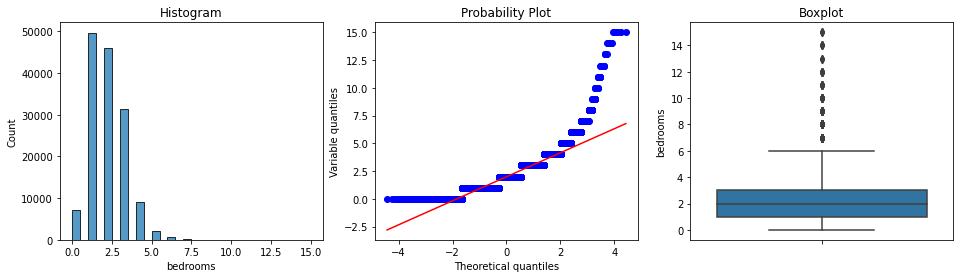


Post imputación


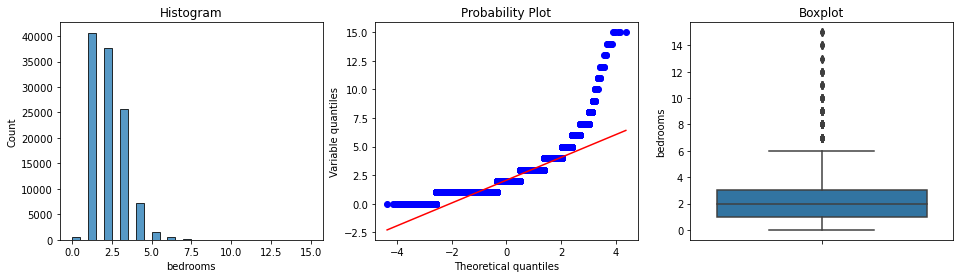

In [23]:
print("Pre imputación")
diagnostic_plots(df, 'bedrooms')
print("\nPost imputación")
diagnostic_plots(df2, 'bedrooms')

2.2.1.2 Rooms


Pre imputación


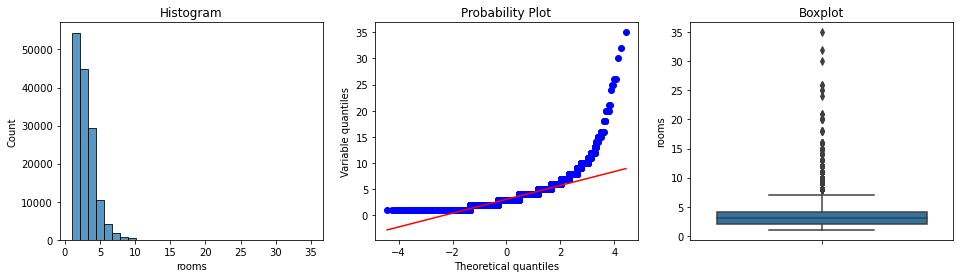


Post imputación


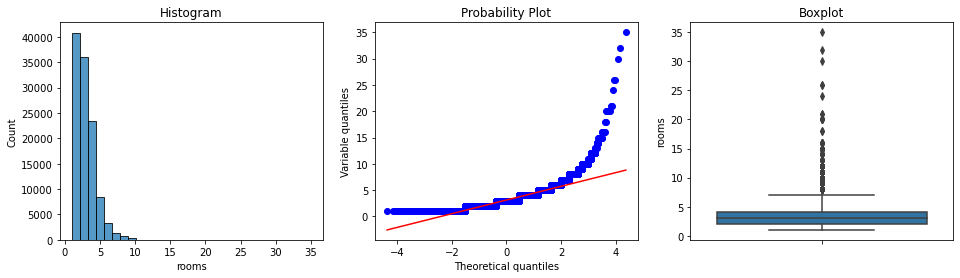

In [24]:
print("\nPre imputación")
diagnostic_plots(df, "rooms")
print("\nPost imputación")
diagnostic_plots(df2, 'rooms')

2.2.1.3 Bathrooms


Pre imputación


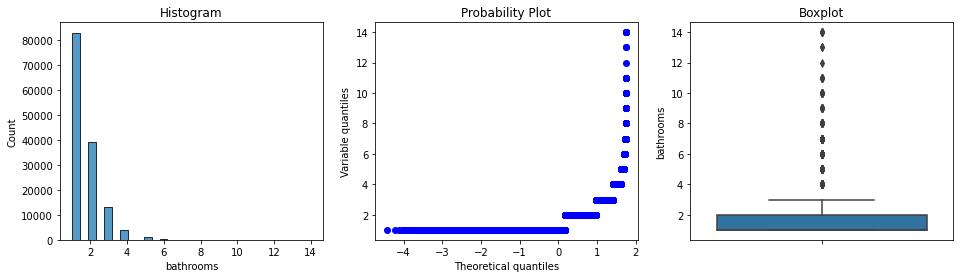


Post imputación


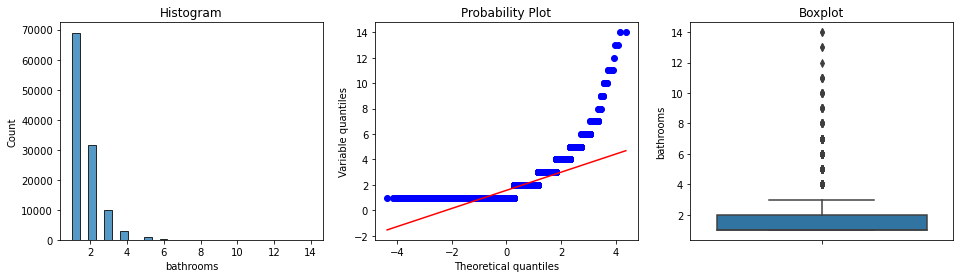

In [25]:
print("\nPre imputación")
diagnostic_plots(df, 'bathrooms')
print("\nPost imputación")
diagnostic_plots(df2, 'bathrooms')

2.2.1.4 Surface Covered


Pre imputación


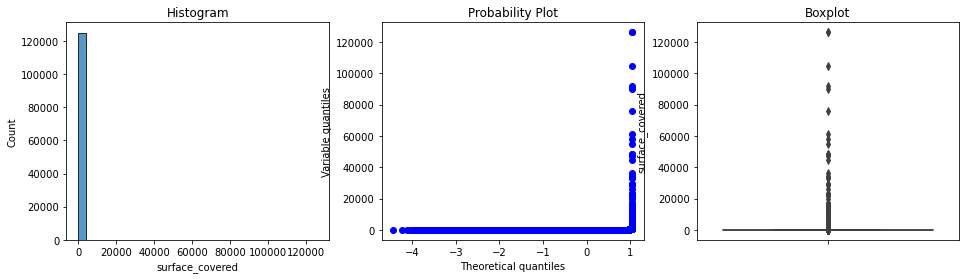


Post imputación


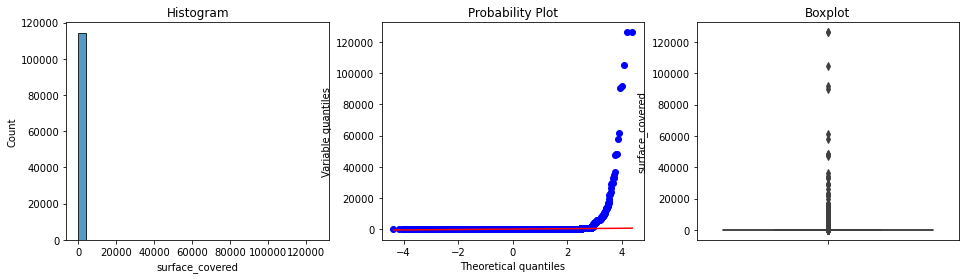

In [26]:
print("\nPre imputación")
diagnostic_plots(df, 'surface_covered')
print("\nPost imputación")
diagnostic_plots(df2, 'surface_covered')

2.2.1.5 Surface Total


Pre imputación


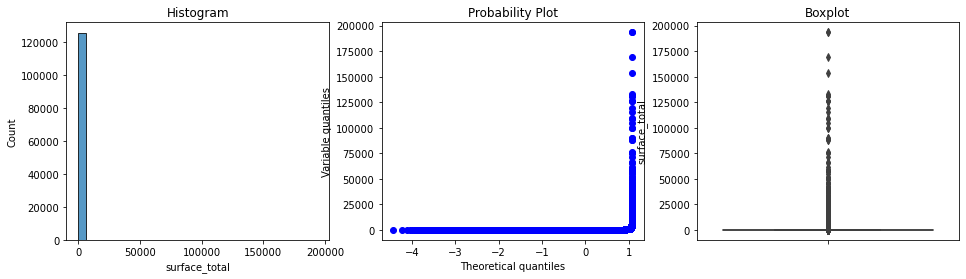


Post imputación


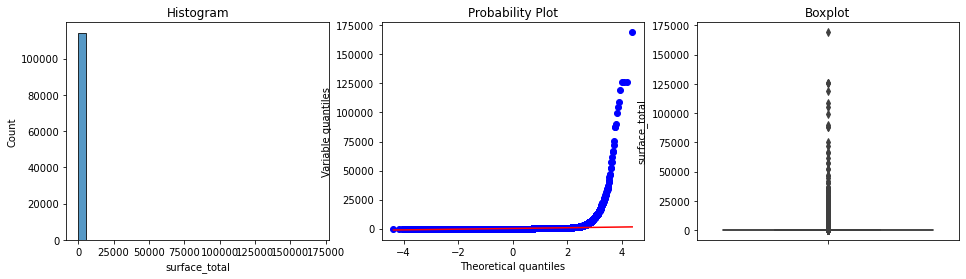

In [27]:
print("\nPre imputación")
diagnostic_plots(df, 'surface_total')
print("\nPost imputación")
diagnostic_plots(df2, 'surface_total')

2.2.1.6 Price


Pre imputación


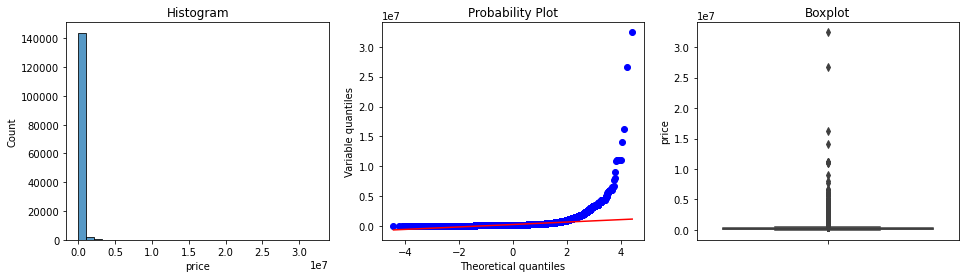


Post imputación


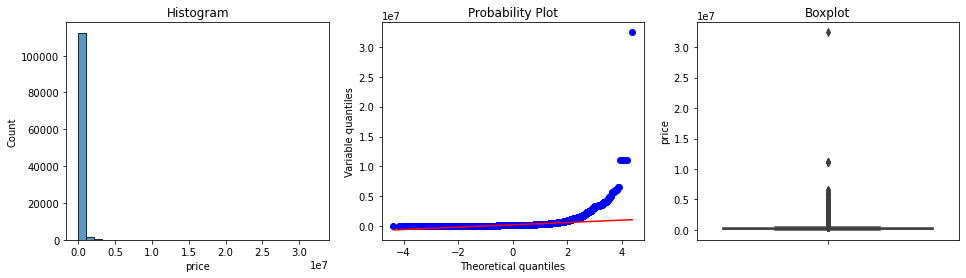

In [28]:
print("\nPre imputación")
diagnostic_plots(df, 'price')
print("\nPost imputación")
diagnostic_plots(df2, 'price')

***

###### 2.3.1 Viewing Distributions and Identifying Outliers

Rooms Outliers

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'Price Boxplot')

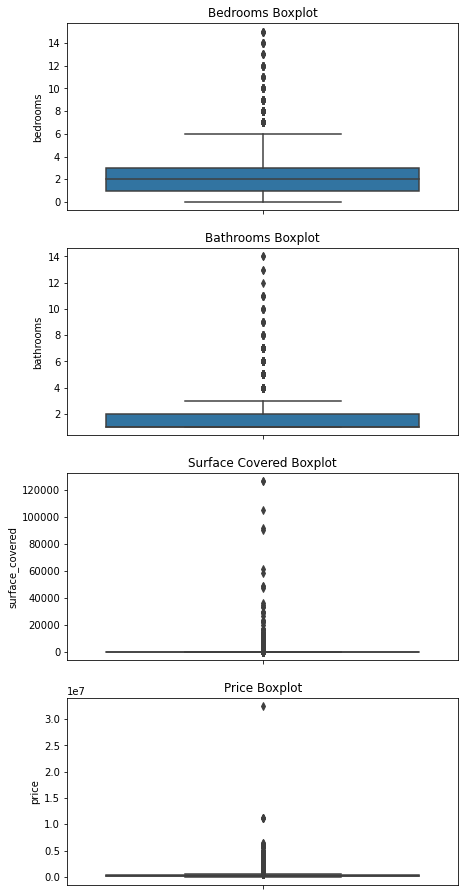

In [29]:

fig = plt.figure(figsize=(7,20))

plt.subplot(2,3,1)
sns.boxplot(y=df2["rooms"])
plt.title('Rooms Boxplot')

plt.subplot(5,1,2)
sns.boxplot(y=df2["bedrooms"],orient="h")
plt.title('Bedrooms Boxplot')

plt.subplot(5,1,3)
sns.boxplot(y=df2["bathrooms"],orient="h")
plt.title('Bathrooms Boxplot')

plt.subplot(5,1,4)
sns.boxplot(y=df2["surface_covered"],orient="h")
plt.title('Surface Covered Boxplot')

plt.subplot(5,1,5)
sns.boxplot(y=df2["price"],orient="h")
plt.title('Price Boxplot')

**2.3.2 Identificación de límites con IQR proximity rule**

In [30]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Rooms Limits

In [31]:
rooms_upper_limit, rooms_lower_limit = find_skewed_boundaries(df2, 'rooms', 1.5)
rooms_upper_limit, rooms_lower_limit

(7.0, -1.0)

Bedrooms Limits

In [32]:
bedrooms_upper_limit, bedrooms_lower_limit = find_skewed_boundaries(df2, 'bedrooms', 1.5)
bedrooms_upper_limit, bedrooms_lower_limit

(6.0, -2.0)

Bathrooms Limits

In [33]:
bathrooms_upper_limit, bathrooms_lower_limit = find_skewed_boundaries(df2, 'bathrooms', 1.5)
bathrooms_upper_limit, bathrooms_lower_limit

(3.5, -0.5)

In [34]:
surface_covered_upper_limit, surface_covered_lower_limit = find_skewed_boundaries(df2, 'surface_covered', 1.5)
surface_covered_upper_limit, surface_covered_lower_limit

(198.5, -45.5)

In [35]:
surface_total_upper_limit, surface_total_lower_limit = find_skewed_boundaries(df2, 'surface_total', 1.5)
surface_total_upper_limit, surface_total_lower_limit

(264.5, -75.5)

Price Limits

In [36]:
price_upper_limit, price_lower_limit = find_skewed_boundaries(df2, 'price', 1.5)
price_upper_limit, price_lower_limit

(487500.0, -108500.0)

###### 2.3.3 Treatment of outliers based on Trimming

The trimming way (remove outlier from the variable):

In [37]:
# let's flag the outliers in the data set

outliers_rooms = np.where(df2['rooms'] > rooms_upper_limit, True,
                       np.where(df2['rooms'] < rooms_lower_limit, True, False))

In [38]:
# let's flag the outliers in the data set

outliers_bedrooms = np.where(df2['bedrooms'] > bedrooms_upper_limit, True,
                       np.where(df2['bedrooms'] < bedrooms_lower_limit, True, False))

In [39]:
# let's flag the outliers in the data set

outliers_bathrooms = np.where(df2['bathrooms'] > bathrooms_upper_limit, True,
                       np.where(df2['bathrooms'] < bathrooms_lower_limit, True, False))

In [40]:
# let's flag the outliers in the data set

outliers_surface_covered = np.where(df2['surface_covered'] > surface_covered_upper_limit, True,
                       np.where(df2['surface_covered'] < surface_covered_lower_limit, True, False))

In [41]:
# let's flag the outliers in the data set

outliers_surface_total = np.where(df2['surface_total'] > surface_total_upper_limit, True,
                       np.where(df2['surface_total'] < surface_total_lower_limit, True, False))

In [42]:
# let's flag the outliers in the data set

outliers_price = np.where(df2['price'] > price_upper_limit, True,
                       np.where(df2['price'] < price_lower_limit, True, False))

In [43]:
# let's trimm the dataset

df2_trimmed = df2.loc[~(outliers_rooms + outliers_bedrooms + outliers_bathrooms + outliers_price),] # we want all the observations except the flagged ones

df2.shape, df2_trimmed.shape

((114488, 19), (103789, 19))

###### 2.3.4 Visualization of outlier post-treatment variables

Rooms

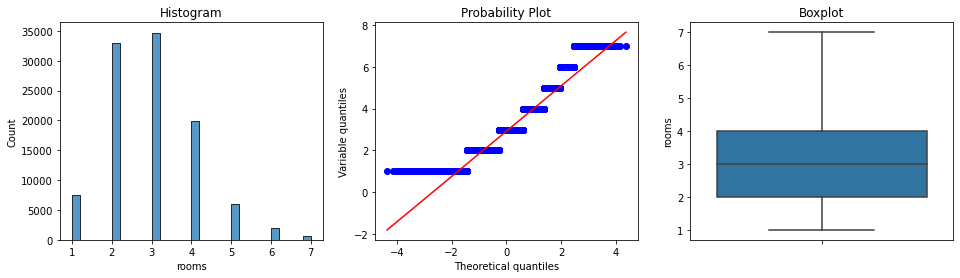

In [44]:
diagnostic_plots(df2_trimmed, "rooms")

Bedrooms

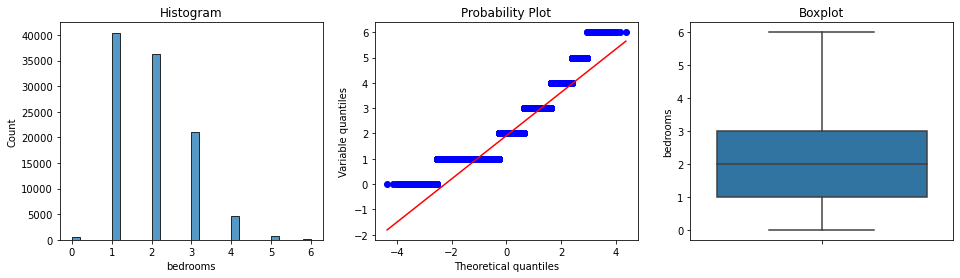

In [45]:
diagnostic_plots(df2_trimmed, "bedrooms")

Bathrooms

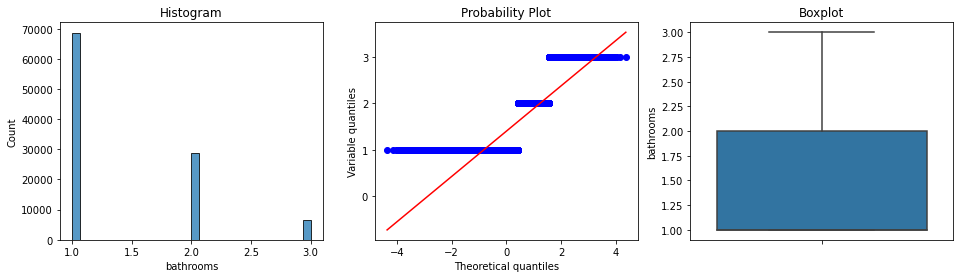

In [46]:
diagnostic_plots(df2_trimmed, "bathrooms")

Price

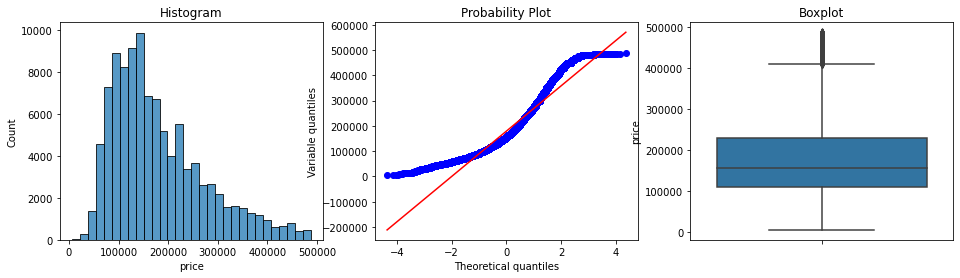

In [47]:
diagnostic_plots(df2_trimmed, "price")

<AxesSubplot:title={'center':'Surface Total Density'}, ylabel='Density'>

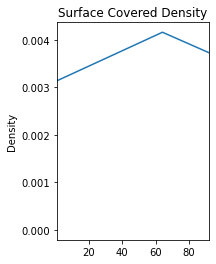

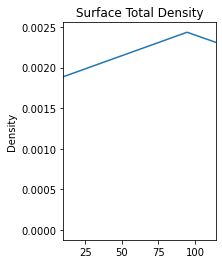

In [48]:
fig = plt.figure()
plt.subplot(1,2,1)
plt.title("Surface Covered Density")
df2_trimmed["surface_covered"].plot(kind="kde",xlim=(1,92), )

fig = plt.figure()
plt.subplot(1,2,2)
plt.title("Surface Total Density")
df2_trimmed["surface_total"].plot(kind="kde", xlim=(10,114))

### 3. Descriptive metrics relevant to property analysis

###### 3.1 Total number of properties (records)

In [53]:
print(df2_trimmed["property_type"].value_counts().sum())
print(df2_trimmed["property_type"].value_counts().sum())

103789
103789


###### 3.1 Total number of properties (records)

In [54]:
prop_unique = df2_trimmed["property_type"].nunique()
prop_unique

10

###### 3.3 Number of records per property type

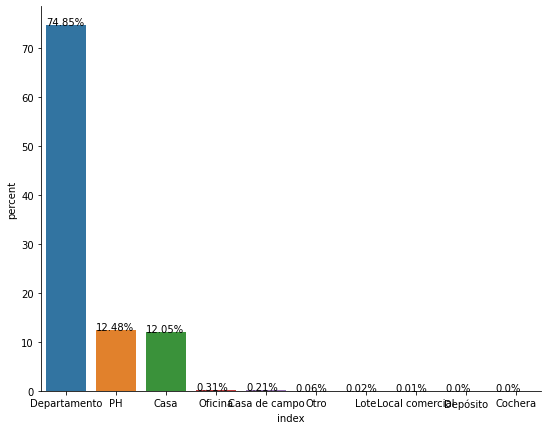

In [55]:

tmp = df2_trimmed['property_type'].value_counts(sort = True, dropna=False, normalize=True)
tmp = tmp.mul(100)
tmp = tmp.rename('percent').reset_index()
tmp = tmp.fillna('Null')
g = sns.catplot(x = 'index', y = 'percent', kind = 'bar', data=tmp)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.gcf().set_size_inches(8, 6)

In [56]:
prop_ins = df2_trimmed["property_type"].value_counts()
prop_ins

Departamento       77684
PH                 12948
Casa               12510
Oficina              319
Casa de campo        219
Otro                  66
Lote                  22
Local comercial       14
Depósito               5
Cochera                2
Name: property_type, dtype: int64

###### 3.4 Distribution of the main characteristics of the properties

In [57]:
pd.set_option('display.float_format', '{:.00f}'.format)
df_describe = df2_trimmed.describe()
df_describe.loc[:,["rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,103789,103789,103789,103789,103789,103789
mean,3,2,1,166,96,179565
std,1,1,1,1467,869,93509
min,1,0,1,10,1,6000
25%,2,1,1,50,45,110000
50%,3,2,1,72,63,157000
75%,4,3,2,114,92,230000
max,7,6,3,169000,126062,487380


###### 3.5 Property Distribution by Region

3.5.1 Number of properties by region

<AxesSubplot:>

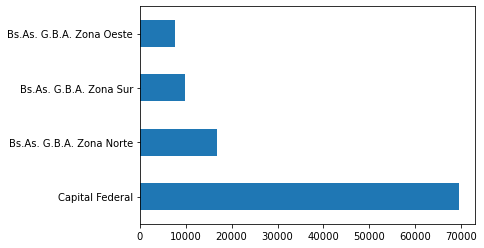

In [58]:
df2_trimmed["l2"].value_counts().plot(kind="barh")

3.5.2 Relative percentage of properties by region

<AxesSubplot:ylabel='l2'>

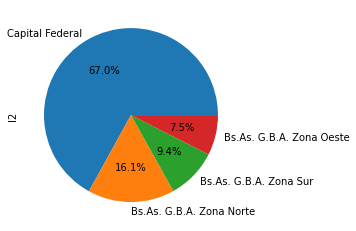

In [59]:
df2_trimmed["l2"].value_counts().plot(kind="pie", autopct='%1.1f%%')

Capital Federal has the largest number of publications, followed by the North Zone, South Zone, and West Zone, correspondingly.

###### 3.6 Number of neighborhoods with properties in Buenos Aires

In [60]:
barrios = df2_trimmed["l3"].nunique()
barrios

89

###### 3.7 Number of properties per neighborhood

Text(0, 0.5, 'Barrio')

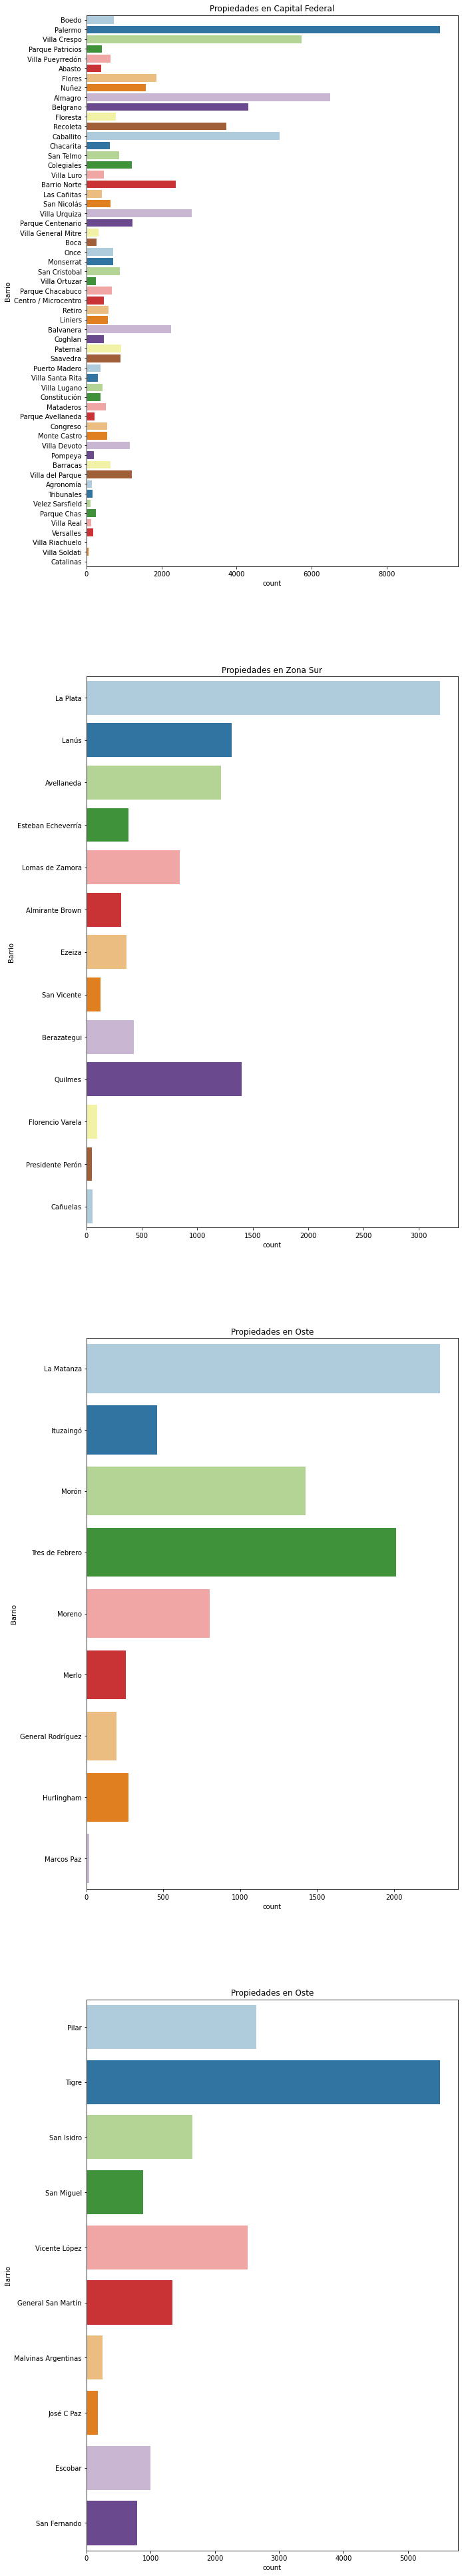

In [61]:

#generamos un dataset para poder visualizar posteriormente cada una de las zonas
cfederal = ["Capital Federal"]
zsur = ["Bs.As. G.B.A. Zona Sur"]
zoeste = ["Bs.As. G.B.A. Zona Oeste"]
znorte = ["Bs.As. G.B.A. Zona Norte"]
data_federal = df2_trimmed[df2_trimmed.l2.isin(cfederal)]
data_sur = df2_trimmed[df2_trimmed.l2.isin(zsur)]
data_norte = df2_trimmed[df2_trimmed.l2.isin(znorte)]
data_oeste = df2_trimmed[df2_trimmed.l2.isin(zoeste)]


# Graficamos
plt.figure(figsize=(10,70))

# capital federal
plt.subplot(4,1,1)
sns.countplot(y="l3",data=data_federal, palette="Paired")
plt.title("Propiedades en Capital Federal")
plt.ylabel("Barrio")

# zona sur
plt.subplot(4,1,2)
sns.countplot(y="l3", data=data_sur, palette="Paired")
plt.title("Propiedades en Zona Sur")
plt.ylabel("Barrio")

# zona oeste
plt.subplot(4,1,3)
sns.countplot(y="l3", data=data_oeste, palette="Paired")
plt.title("Propiedades en Oste")
plt.ylabel("Barrio")

# zona norte
plt.subplot(4,1,4)
sns.countplot(y="l3", data=data_norte, palette="Paired")
plt.title("Propiedades en Oste")
plt.ylabel("Barrio")


***